In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [40]:
#load training data
train=pd.read_csv('TrainData.csv')

#load testing data
test=pd.read_csv('TestData.csv')

In [10]:
train.head(15)

,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,T_10,...,T_10296,T_10297,T_10298,T_10299,T_10300,T_10301,T_10302,T_10303,T_10304,Label
0,48,51,43,44,56,50,39,46,57,50,...,39,41,43,46,47,48,47,47,47,1
1,59,66,64,52,44,50,59,64,70,70,...,30,30,31,32,32,35,35,34,34,1
2,40,40,54,47,56,35,69,43,37,37,...,31,32,31,30,31,30,30,29,28,1
3,62,52,34,43,31,36,27,34,35,45,...,170,165,159,162,168,141,37,8,27,1
4,62,74,71,51,44,57,69,69,63,52,...,30,32,34,34,34,37,38,38,39,1
5,138,136,134,133,134,134,134,134,133,134,...,16,18,19,20,19,22,24,31,43,2
6,137,137,136,136,136,136,136,137,137,135,...,17,17,17,18,19,16,19,25,30,2
7,137,137,135,135,138,140,133,125,140,126,...,15,14,16,21,25,21,25,17,42,2
8,127,126,123,123,132,142,138,127,137,127,...,18,31,53,66,68,66,61,58,62,2
9,135,135,135,133,132,132,135,138,134,135,...,26,22,17,17,21,17,17,17,17,2


In [42]:
#get all but last column and convert to numpy array
train_data = train.iloc[:,:-1].to_numpy()
test_data = test.iloc[:,:-1].to_numpy()


#get last column and convdert to numpy array
train_label = train.iloc[:,-1].to_numpy()
test_label = test.iloc[:,-1].to_numpy()


print(train_data.shape)
print(train_label.shape)

(200, 10304)
(200,)


In [20]:
#get first row of training data
x = train_data[0, :]

#reshape first row
image = x.reshape((112,92))

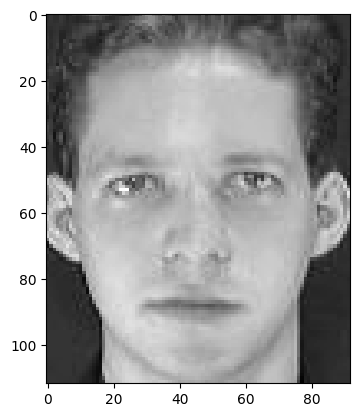

In [22]:
#show first row of data as image
plt.imshow(image, cmap='gray')

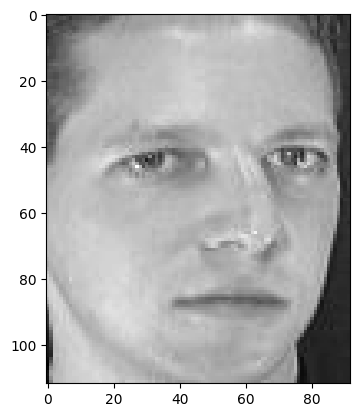

In [24]:
x = train_data[1, :]
image = x.reshape((112,92))
plt.imshow(image, cmap='gray')

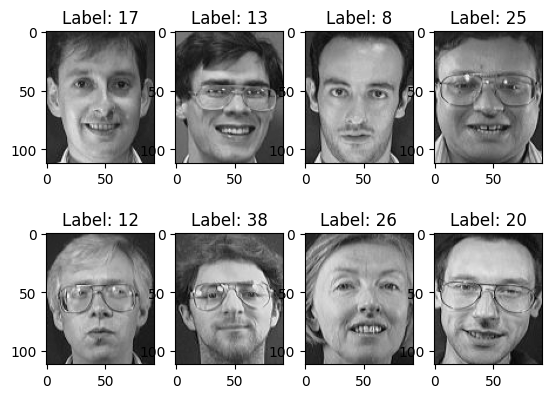

In [30]:
#create 8 subplots in 2 rows and 4 columns
fig, axes = plt.subplots(2, 4)

#randomly choose 8 samples out of 200 
indices = np.random.choice(200, 8)

#loop through axes and flat and get index + value
#show the 8 random samples chosen
for i, ax in enumerate(axes.flat):
    idx = indices[i]
    x = train_data[idx, :]
    label = train_label[idx]
    image = x.reshape((112,92))
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {label}')


In [32]:
def dis(x,y):
    """dis(x, y) calculates distance between x and y """
    #calculate norm 2 of x and y  - distance
    return np.linalg.norm(x-y,2)**2

def myClassifier(Train, Trainlabel, Test):
    """myClassifier(Train, Trainlabel, Test)
    Train is the training data, Trainlabel is the training labels, Test is the testing data"""
    pred = []
    for testpoint in Test:
        pred_dis = []
        for trainpoint in Train:
            pred_dis.append(dis(testpoint, trainpoint))
        pred.append(Trainlabel[np.argmin(pred_dis)])
    return np.array(pred)


In [36]:
# reduce training data dimensions
pca = PCA(n_components=5)
reduced_data=pca.fit_transform(train_data)
print(reduced_data.shape)

(200, 5)


In [44]:
reduced_data=pca.fit_transform(test_data)
